In [1]:
#folders where images are stored
trainimg = r"C:\Users\das361h\Desktop\s24\AI\kag2\train"
testimg = r"C:\Users\das361h\Desktop\s24\AI\kag2\test"
validimg = r"C:\Users\das361h\Desktop\s24\AI\kag2\val"

In [2]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [3]:
# Create ImageDataGenerator for training set
# Create ImageDataGenerator for validation set
# Create ImageDataGenerator for testing set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range=[0.5, 1.1],
                                   validation_split=0.2)

valid_datagen = ImageDataGenerator(rescale=1./255, 
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Load and prepare training data
training_set = train_datagen.flow_from_directory(trainimg,
                                                 target_size = (64, 64),
                                                 color_mode="grayscale",
                                                 batch_size = 32,
                                                 class_mode = "binary",
                                                 shuffle=True,
                                                 subset="training")

valid_set = train_datagen.flow_from_directory(validimg,
                                              target_size = (64, 64),
                                              color_mode="grayscale",
                                              batch_size = 32,
                                              class_mode = "binary",
                                              shuffle=False,
                                              subset="validation")

test_set = test_datagen.flow_from_directory(testimg,
                                            target_size = (64, 64),
                                            color_mode="grayscale",
                                            class_mode = "binary",
                                            batch_size=32)

Found 4613 images belonging to 2 classes.
Found 246 images belonging to 2 classes.
Found 1238 images belonging to 2 classes.


In [4]:
labels_index = { 0 : "mario", 1 : "wario" }  #label the classes
training_set.class_indices

{'mario': 0, 'wario': 1}

In [5]:
#Create the cnn model
classmodel = Sequential()

classmodel.add(Conv2D(32, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))
classmodel.add(MaxPooling2D(pool_size = (2, 2)))

classmodel.add(Conv2D(32, (3, 3), activation = 'relu'))
classmodel.add(MaxPooling2D(pool_size = (2, 2)))

classmodel.add(Conv2D(64, (3, 3), activation = 'relu'))
classmodel.add(MaxPooling2D(pool_size = (2, 2)))

classmodel.add(Flatten())

classmodel.add(Dense(units = 64, activation = 'relu'))
classmodel.add(Dropout(0.2)) #overfitting adjustment
classmodel.add(Dense(units = 1, activation = 'sigmoid'))

classmodel.summary()

C:\Users\das361h\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,649 (686.13 KB)

 Trainable params: 175,649 (686.13 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
classmodel.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001),
                       loss = "binary_crossentropy", metrics = ["accuracy"]) #binary crossentropy for binary classification

In [7]:
his = classmodel.fit(training_set,
                   validation_data=valid_set,
                   epochs = 50)

Epoch 1/50


C:\Users\das361h\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


145/145 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.6765 - loss: 0.6201 - val_accuracy: 0.7073 - val_loss: 0.6105
Epoch 2/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.7175 - loss: 0.5320 - val_accuracy: 0.7317 - val_loss: 0.5314
Epoch 3/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.7783 - loss: 0.4614 - val_accuracy: 0.7846 - val_loss: 0.4788
Epoch 4/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7982 - loss: 0.4135 - val_accuracy: 0.7886 - val_loss: 0.4735
Epoch 5/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.8556 - loss: 0.3369 - val_accuracy: 0.8455 - val_loss: 0.4185
Epoch 6/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8650 - loss: 0.3125 - val_accuracy: 0.8618 - val_loss: 0.3680
Epoch 7/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.8924 - loss: 0.2477 - val_accuracy: 0.8171 - val_loss: 0.4202
Epoch 8/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9098 - loss: 0.2223 - val_accuracy: 0.865

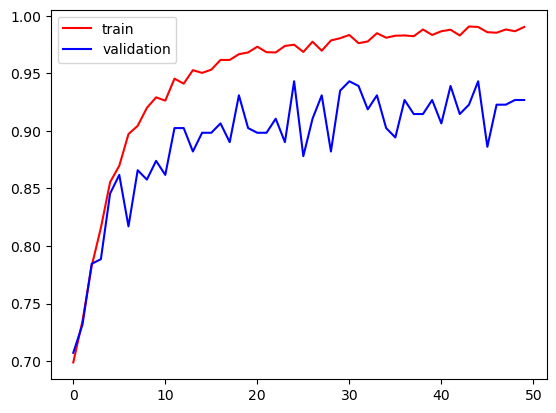

In [8]:
import matplotlib.pyplot as plt

plt.plot(his.history['accuracy'],color='red',label='train')
plt.plot(his.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

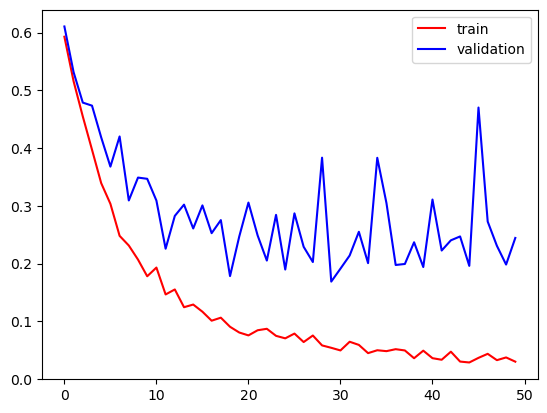

In [9]:
plt.plot(his.history['loss'],color='red',label='train')
plt.plot(his.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [10]:
predictions = classmodel.predict(test_set)  #predict usint the model and test dataset
print(predictions)

 3/39 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step 

C:\Users\das361h\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step
[[9.9997699e-01]
 [9.9999940e-01]
 [8.3155546e-06]
 ...
 [9.9969923e-01]
 [3.4505692e-18]
 [1.0000000e+00]]


In [11]:
len(predictions)

1238

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_set.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[173 221]
 [349 495]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.44      0.38       394
           1       0.69      0.59      0.63       844

    accuracy                           0.54      1238
   macro avg       0.51      0.51      0.51      1238
weighted avg       0.58      0.54      0.55      1238



In [13]:
classmodel.save('binary_image_mario.keras') #save the model as .keras file